#This is episode 1 season 1 in "Will It Learn?"
The idea is to test your intuition. We will present a problem and then ask you to predict ahead of time whether the network is capable of predicting the output, given the input. 

## Welcome to Colab notebook!
If this is your first notebook, then you are in for a treat. This sets up a complete machine learning environment with just a few clicks. And furthermore, uses free GPU accelerated learning to get you results fast.

##Let's start the first experiment. 
I was curious if a vanilla convolutional neural network would learn to count the number of circles in an image. To make it harder, the circles can overlap. And to constrain the problem, only 1 to 10 circles will be seen. They will be on a black background. The circles will be filled in white with a red outline. The circles will have a random radius. Postion will not be constrained, and may overlap or obscure one another completely.

Here's a sample image:



7 circles


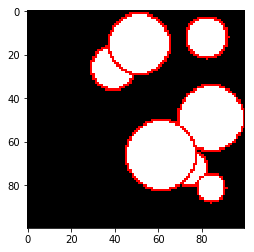

In [9]:
#This is a code cell. Click on the cell to make it active. Then click on the left corner arrow in a circle button to run it. Or use the keyboard shortcut ctlr+enter.
import numpy as np
from PIL import Image, ImageDraw
import random
import matplotlib.pyplot as plt
%matplotlib inline

img_shape = (100, 100, 3)

def img_w_circles(img_shape, max_circ=10, max_radius=32):
  w = img_shape[1]
  h = img_shape[0]
  img = Image.new('RGB', size=(w, h))
  draw = ImageDraw.Draw(img)
  num_circles = random.randint(1, max_circ)

  for iC in range(num_circles):
    sz = random.randint(10, max_radius)
    x1 = random.randint(1, w - sz)
    y1 = random.randint(1, h - sz)
    x2 = x1 + sz
    y2 = y1 + sz
    coords = (x1, y1, x2, y2)
    #print(coords, sz)
    draw.ellipse(coords, fill="white", outline='red')  

  img = np.array(img).astype(np.uint8)
  return img, num_circles

img, num = img_w_circles(img_shape, max_radius=32)
print(num, "circles")
plt.imshow(img)
plt.show()

#You should see an image with some circles on a black background. Run this multiple times to see the different outputs it can create.

##What do you think?
Will this somewhat simple network accomplish the task of counting the number of circles? 


Let's find out...

First let's make sure you are using the GPU. Run the cell bellow to double check:

In [0]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()
#if you see something like '/device:GPU:0' then the gpu accelerated learning will be enabled. if not, cpu will work, just slower.

##Our Neural Network

Here's what our network will look like. Pretty straight foward, 4 layers of convolutions. 64 filters per layer. A 3x3 kernel used in each. With relu activation in each. 

In [6]:
#Let's define a pretty straight forward conv neural network. It will have about 200K params, given the input image dimension of 100 x 100
# import keras
# from keras.layers import Flatten, Conv2D, Dense

# max_circles = 10
# img = keras.Input(shape=img_shape)

# x = img
# x = Conv2D(64, (3, 3), strides=(2,2), activation="relu")(x)
# x = Conv2D(64, (3, 3), strides=(2,2), activation="relu")(x)
# x = Conv2D(64, (3, 3), strides=(2,2), activation="relu")(x)
# x = Conv2D(64, (3, 3), strides=(2,2), activation="relu")(x)
# x = Flatten()(x)
# x = Dense(100)(x)
# x = Dense(1)(x)

# model = keras.Model(img, x)
# model.compile(optimizer="adam", loss="mse", metrics=["acc"])
# print(model.summary())


model loaded hic


In [5]:
# Here's function that will generate a numpy array of images for our NN to train on
def generator(img_shape, batch_size):
  while True:
    X = []
    y = []
    for i in range(batch_size):
      img, num_circles = img_w_circles(img_shape)
      X.append(img)
      y.append(num_circles)
    yield np.array(X), np.array(y)



In [11]:
#Now let's start the training. This will happen pretty quickly; about 3 minutes.
#It can be run longer, for increased accuracy. But this should give us an indication
#of whether it's a waste of time to try.

# batch_size = 64
# steps_per_epoch = 256
# epochs = 10

# train_gen = generator(img_shape, batch_size)

# model.fit_generator(train_gen, 
#                     steps_per_epoch=steps_per_epoch, 
#                     epochs=epochs, 
#                     verbose=1)


from keras.models import load_model
model = load_model("circles2.h5")
print ("model loaded, hic")


model loaded, hic


9 circles


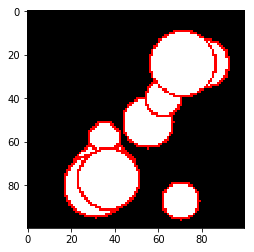

raw prediction:  9.69831
rounded:  10.0 circles


In [12]:
#Now let's create a new image and see how it does.
#Run this multiple times to get a feeling about how it handles different cases.

img, num = img_w_circles(img_shape, max_radius=32)
print(num, "circles")
plt.imshow(img)
plt.show()

res = model.predict(img[None, :, :, :])
print("raw prediction: ", res[0][0])
print("rounded: ",  round(res[0][0]), "circles")

#So What's Your Verdict?
Do you think this learned to count the number of circles? 

In my opinion, it was much better than expected. It was not clear at all that it would handle the cases where one circle partially obscurred another. I've seen many cases where it handled it quite well. It wasn't 100% accurate, but I feel like that's more a matter of time spent training on a large data set. 

#Further thought..
What caused failures? Where could the network be changed to improve the result? Would this scale to real world data? What happens when we ask it to count more circles than it saw in training? What happens when the radius or color change outside our test set?


#Episodes Links:

[Will It Learn? - S01E01 Circle Count](https://drive.google.com/open?id=11EiFFa-imh5MNEPJZuqgqJAwLYHhP3gG)

[Will It Learn? - S01E02 Tic Tace Toe](https://drive.google.com/open?id=1PKosDR9wcgPaF2-BYMSZiu2nW03COxma)

[Will It Learn? - S01E03 : Shell Game](https://drive.google.com/open?id=163iv-LaidgxiU3tT_RcLCT_K1HOdagMu)

[Will It Learn? - S01E04 : Word Jumble](https://drive.google.com/open?id=19ENSHOC-TEyDqZ-_47QhSHHxhUAuDEoA)

[Will It Learn? - S01E05 : Mazes](https://drive.google.com/open?id=1qdYWNwrmYAtFsayzoxPuuGAE1RTKt1ia)


